In [2]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img

from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

### Elastic Net l1/l2

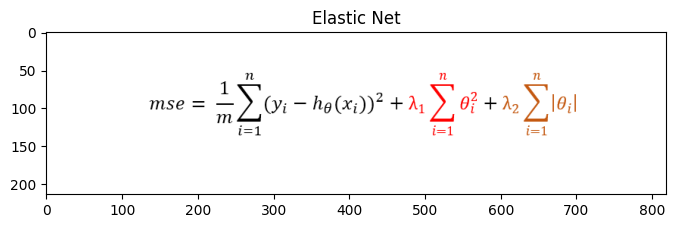

In [3]:
# Load image

plt.figure(figsize= (8,8))
mi = img.imread(r'elastic_net.png')
plt.title('Elastic Net')
plt.imshow(mi);

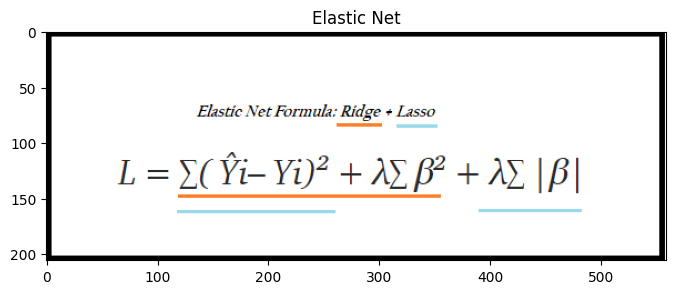

In [4]:
# Load image

plt.figure(figsize= (8,8))
mi = img.imread(r'elastic_net1.png')
plt.title('Elastic Net')
plt.imshow(mi);

### Elastic Net fom Scratch

In [4]:
def elastic_net_regression_gd(X, y, alpha=0.1, lambda1=0.5, lambda2=0.5, epochs=100, threshold=0.1):
    m, n = X.shape
    theta = np.ones(n)  # Initialize all weights to 1
   
    for epoch in range(epochs):
        # Compute the gradient for MSE
        gradient = (-1/m) * X.T @ (y - X @ theta)

        # Apply Elastic Net shrinkage (L1 + L2 regularization)
        gradient += lambda1 * np.sign(theta) + 2 * lambda2 * theta

        # Update weights
        theta -= alpha * gradient

        # Apply thresholding to force small weights to zero (L1 effect)
        theta[np.abs(theta) < threshold] = 0

        # Print weights after every 10 epochs
        if epoch % 10 == 0:
            print(f"Epoch {epoch}: Theta = {theta}")
   
    return theta

# Example dataset with 3 features
X = np.array([[2, 0.5, 0],
              [3, 0.2, 0.1],
              [5, 0.1, -0.2]])
y = np.array([6, 9, 15])

# Run Elastic Net Regression
optimal_theta = elastic_net_regression_gd(X, y, alpha=0.1, lambda1=0.5, lambda2=0.5, epochs=100)

print("\nFinal theta values after Elastic Net regression:", optimal_theta)

Epoch 0: Theta = [3.33666667 0.98       0.80166667]
Epoch 10: Theta = [2.73682906 0.10232051 0.        ]
Epoch 20: Theta = [2.74390299 0.         0.        ]
Epoch 30: Theta = [2.74390244 0.         0.        ]
Epoch 40: Theta = [2.74390244 0.         0.        ]
Epoch 50: Theta = [2.74390244 0.         0.        ]
Epoch 60: Theta = [2.74390244 0.         0.        ]
Epoch 70: Theta = [2.74390244 0.         0.        ]
Epoch 80: Theta = [2.74390244 0.         0.        ]
Epoch 90: Theta = [2.74390244 0.         0.        ]

Final theta values after Elastic Net regression: [2.74390244 0.         0.        ]


In [6]:
# Generate synthetic dataset
np.random.seed(42)
X = np.random.randn(100, 3)  # 100 samples, 3 features
true_theta = np.array([3, 0, 2])  # Feature 2 is irrelevant (should be removed)
y = X @ true_theta + np.random.randn(100) * 0.5  # Adding noise

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing features (Important for Elastic Net!)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Elastic Net Model
elastic_net = ElasticNet(alpha=1.0, l1_ratio=0.5, max_iter=10000, random_state=42)
elastic_net.fit(X_train_scaled, y_train)

# Get coefficient values
print("Elastic Net Coefficients:", elastic_net.coef_)

# Evaluate the model
train_score = elastic_net.score(X_train_scaled, y_train)
test_score = elastic_net.score(X_test_scaled, y_test)
print(f"Train Score: {train_score:.4f}")
print(f"Test Score: {test_score:.4f}")

Elastic Net Coefficients: [ 1.17619613 -0.          0.99185686]
Train Score: 0.6959
Test Score: 0.6691


Iteration 1: Theta = 1.6500
Iteration 2: Theta = 1.9750
Iteration 3: Theta = 2.1375
Iteration 4: Theta = 2.2188
Iteration 5: Theta = 2.2594
Iteration 6: Theta = 2.2797
Iteration 7: Theta = 2.2898
Iteration 8: Theta = 2.2949
Iteration 9: Theta = 2.2975
Iteration 10: Theta = 2.2987
Iteration 11: Theta = 2.2994
Iteration 12: Theta = 2.2997
Iteration 13: Theta = 2.2998
Iteration 14: Theta = 2.2999
Iteration 15: Theta = 2.3000
Iteration 16: Theta = 2.3000
Iteration 17: Theta = 2.3000
Iteration 18: Theta = 2.3000
Iteration 19: Theta = 2.3000
Iteration 20: Theta = 2.3000


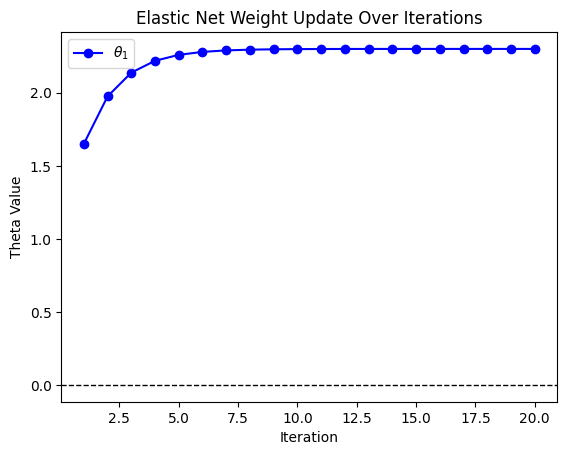

In [7]:
# Initialize values
theta = 1.0  # Initial weight
x = 2  # Feature value
y = 6  # True target
alpha = 0.1  # Learning rate
lambda1 = 0.5  # Lasso penalty
lambda2 = 0.5  # Ridge penalty
m = 1  # Single data point for simplicity

# Track weight updates
iterations = 20
theta_values = []

for i in range(iterations):
    # Step 1: Compute MSE Gradient
    gradient = - (x * (y - (x * theta))) / m  # - x (y - Xθ)
   
    # Step 2: Apply Lasso (L1) Penalty
    gradient += lambda1 * np.sign(theta)  
   
    # Step 3: Apply Ridge (L2) Penalty
    gradient += 2 * lambda2 * theta  
   
    # Step 4: Update theta
    theta -= alpha * gradient  

    # Store updated theta value
    theta_values.append(theta)
   
    # Print each step
    print(f"Iteration {i+1}: Theta = {theta:.4f}")

# Plot the weight updates
plt.plot(range(1, iterations+1), theta_values, marker='o', linestyle='-', color='b', label=r'$\theta_1$')
plt.xlabel("Iteration")
plt.ylabel("Theta Value")
plt.title("Elastic Net Weight Update Over Iterations")
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.legend()
plt.show()

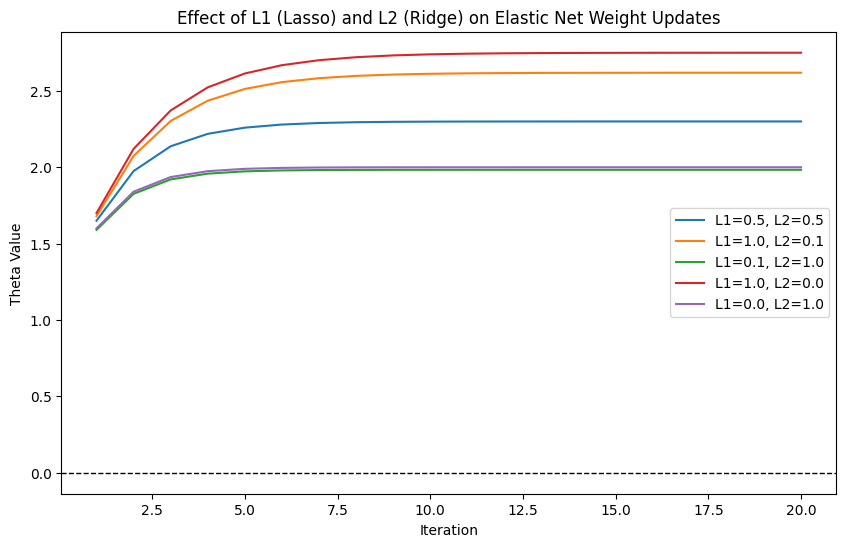

In [8]:
# impact of different lamda values of l1 and l2

# Initialize parameters
x = 2  # Feature value
y = 6  # True target
alpha = 0.1  # Learning rate
m = 1  # Single data point for simplicity
iterations = 20  # Number of updates

# Different L1 and L2 penalty combinations to compare
lambda_combinations = [
    (0.5, 0.5),  # Equal Lasso and Ridge (Balanced Elastic Net)
    (1.0, 0.1),  # Mostly Lasso (Feature Selection Dominant)
    (0.1, 1.0),  # Mostly Ridge (Coefficient Shrinkage Dominant)
    (1.0, 0.0),  # Pure Lasso
    (0.0, 1.0)   # Pure Ridge
]

# Plot setup
plt.figure(figsize=(10, 6))

# Iterate over different penalty settings
for lambda1, lambda2 in lambda_combinations:
    theta = 1.0  # Reset initial weight
    theta_values = []  # Track updates

    for i in range(iterations):
        # Step 1: Compute MSE Gradient
        gradient = - (x * (y - (x * theta))) / m  # - x (y - Xθ)
       
        # Step 2: Apply Lasso (L1) Penalty
        gradient += lambda1 * np.sign(theta)  

        # Step 3: Apply Ridge (L2) Penalty
        gradient += 2 * lambda2 * theta  

        # Step 4: Update theta
        theta -= alpha * gradient  
        theta_values.append(theta)

    # Plot the weight updates for this combination
    plt.plot(range(1, iterations + 1), theta_values, label=f"L1={lambda1}, L2={lambda2}")

# Graph labels and legend
plt.xlabel("Iteration")
plt.ylabel("Theta Value")
plt.title("Effect of L1 (Lasso) and L2 (Ridge) on Elastic Net Weight Updates")
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.legend()
plt.show()